In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Admission_Predict.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(400, 9)

In [13]:
#dropping Serial No. column because it is unnecessary
df.drop(columns = ['Serial No.'],inplace = True)

In [14]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
x= df.iloc[:,0:-1]
y = df.iloc[:,-1]


0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Creating model architecture

In [44]:
model = Sequential()
model.add(Dense(7,activation = 'relu',input_dim = 7))
model.add(Dense(1,activation = 'linear')) # jb bhi regresssion problem prr kaam kr rhy hon to activation function linear ho ga

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss = 'mean_squared_error',optimizer = 'Adam')

In [47]:
history = model.fit(x_train_scaled,y_train,epochs = 10,validation_split = 0.2)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 1.6838 - val_loss: 1.6183
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.5181 - val_loss: 1.4490
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.3639 - val_loss: 1.2923
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.2176 - val_loss: 1.1499
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0855 - val_loss: 1.0205
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9642 - val_loss: 0.9035
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8572 - val_loss: 0.7965
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7581 - val_loss: 0.7008
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6706 - val_loss: 0.6143
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5901 - val_loss: 0.5378


In [48]:
y_pred=model.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-18.948228666521175

# Improved architecture

In [51]:
model = Sequential()
model.add(Dense(7,activation = 'relu',input_dim = 7))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.compile(loss = 'mean_squared_error',optimizer = 'Adam')

In [57]:
history = model.fit(x_train_scaled,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0323 - val_loss: 0.0275
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0302 - val_loss: 0.0258
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0281 - val_loss: 0.0245
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0263 - val_loss: 0.0229
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0249 - val_loss: 0.0213
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0232 - val_loss: 0.0193
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0217 - val_loss: 0.0181
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0206 - val_loss: 0.0173
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0197 - val_loss: 0.0166
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0190 - val_loss: 0.0161
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0183 - val_loss: 0.0159
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0176 - val_lo

In [58]:
y_pred=model.predict(x_test_scaled)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6750947411214804

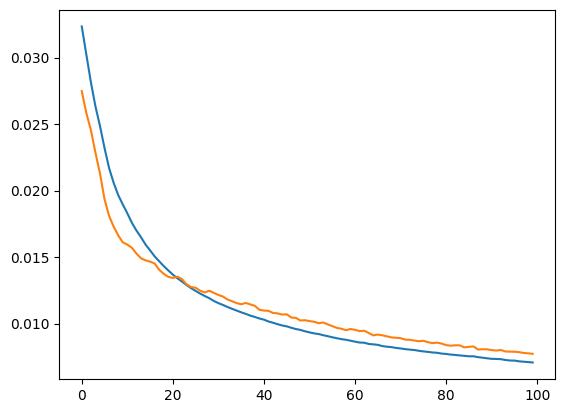

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])